In [1]:
%matplotlib inline 
import pandas as pd
import matplotlib.pyplot as plt
import psycopg2
from anyio.streams import file

In [2]:
conn = None
cursor = None

#establishing the connection
conn = psycopg2.connect(
    database="mydatabase", user="postgres", password="password", host="localhost", port= 5432
)

cursor = conn.cursor()
cursor.execute("select * from wealthmanager.assetmaster")
result = cursor.fetchall()
df = pd.DataFrame.from_records(result, columns=[x[0] for x in cursor.description])
imported_assets = df[df["username"]=="partha"]
imported_assets.assign(valuationdate = pd.to_datetime(imported_assets["valuationdate"]))

pivotedAssets =imported_assets.pivot(index="valuationdate", columns="assetname", values=['amount'])
dftemp = pivotedAssets
mylist = list(dftemp.columns)
dftemp['total'] = dftemp[dftemp.columns].sum(axis=1)


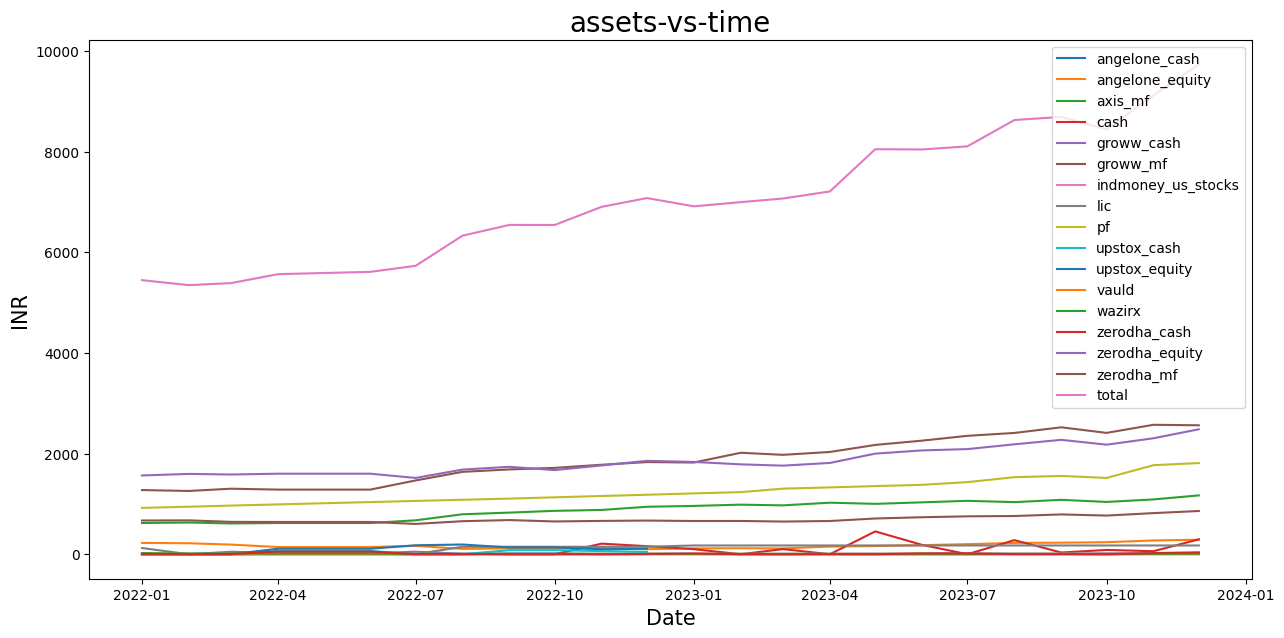

In [3]:
fig = plt.subplots(figsize=(15, 7))
plt.xlabel('Date', fontsize=15)
plt.ylabel('INR', fontsize=15)
plt.title('assets-vs-time', fontsize=20)

for item in list(dftemp.columns)[:-1:]:
    plt.plot(dftemp.index, dftemp[item], label= item[1])
 
plt.plot(dftemp.index, dftemp[('total')], label='total')
plt.legend()
#plt.savefig('test.jpeg')
plt.show()
plt.close()